Name:

Register Number:

In [46]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[9]

In [6]:
single_image.shape

(28, 28)

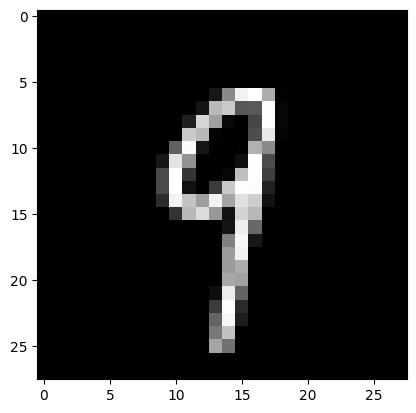

In [20]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

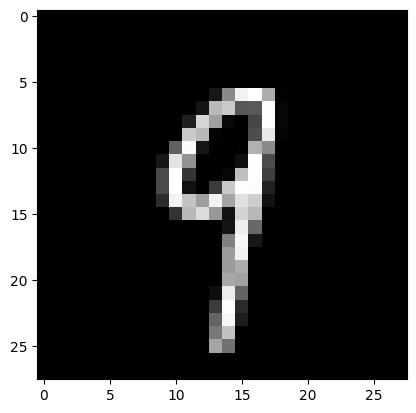

In [19]:
single_image = X_train[900]
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: Priyadharshan S

Register Number: 212223240127

In [25]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [33]:

model.compile(loss=CategoricalCrossentropy(),
              optimizer='adam',
              metrics='accuracy')

In [34]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 45s 47ms/step - loss: 0.1531 - accuracy: 0.9550 - val_loss: 0.0549 - val_accuracy: 0.9815
Epoch 2/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0380 - val_accuracy: 0.9871
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0266 - val_accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 43s 45ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0444 - val_accuracy: 0.9836
Epoch 5/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0312 - val_accuracy: 0.9907


In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.153060,0.955000,0.054948,0.9815
1,0.046676,0.985817,0.037992,0.9871
2,0.033884,0.989533,0.026643,0.9902
3,0.024132,0.992183,0.044359,0.9836
4,0.019135,0.993983,0.031242,0.9907


<Axes: >

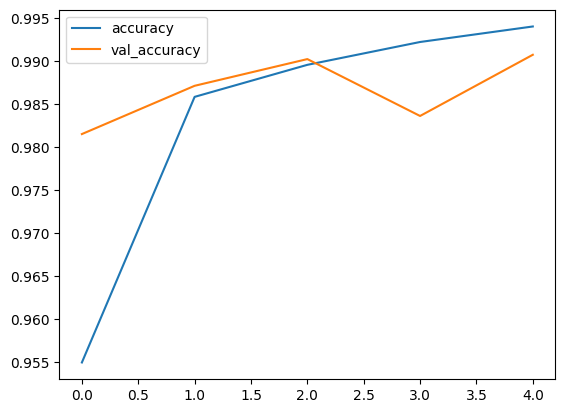

In [37]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

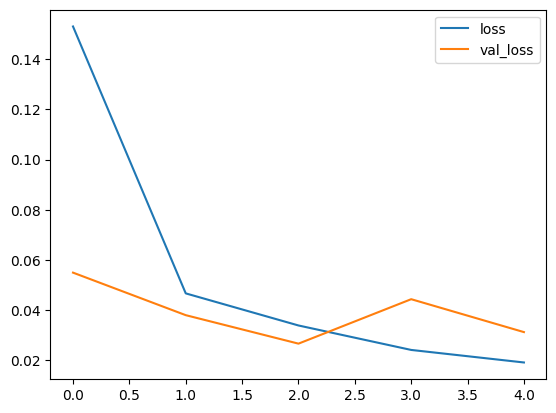

In [38]:
metrics[['loss','val_loss']].plot()

In [39]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [40]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    0    1    0    1    0    0    1    1    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   1    2 1017    0    3    0    1    5    3    0]
 [   1    0    2  998    0    6    0    1    2    0]
 [   0    0    0    0  980    0    0    0    1    1]
 [   1    0    0    5    0  883    1    1    1    0]
 [   3    2    0    0    4    4  944    0    1    0]
 [   0    6    4    0    0    0    0 1016    1    1]
 [   2    0    1    0    0    1    0    2  965    3]
 [   0    1    1    1    5    4    0    1    2  994]]


In [41]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [72]:
# img = image.load_img('imagenine.jpg')
img = image.load_img('/prototype.png')

In [52]:
type(img)

PIL.Image.Image

In [73]:
img = image.load_img('/prototype.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [74]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 33ms/step


In [75]:
print(x_single_prediction)

[9]


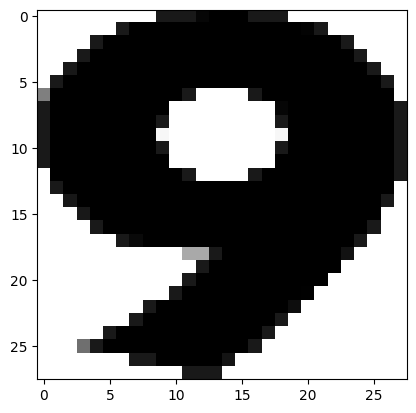

In [76]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [77]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [78]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 19ms/step


In [79]:
print(x_single_prediction)

[5]
